In [51]:
import subprocess
import json
import re
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [125]:
# dont know how to set linux env variables from subprocess so bench is run from script
def runBenchmarks(weights, c, n):
    args = "./run.sh " + ','.join(str(x) for x in weights) + "," + str(c) + " " + str(n)
    p = subprocess.Popen(args, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    return output

# get lir phase compilation time from benchmark console output
def getCompilationTime(bench_output):
    p = re.compile('LIRPhaseTime_AllocationStage_Accm=([\d|.]*)')
    accm_time = p.findall(bench_output.decode("utf-8"))
    p = re.compile('LIRPhaseTime_AllocationStage_Flat=([\d|.]*)')
    flat_time = p.findall(bench_output.decode("utf-8"))
    return (list(map(float, accm_time)), list(map(float, flat_time)))

# get median performance metric from json output file (running time, ms, lower is better)
def getPerformanceResults():
    result = []
    with open('out.json') as f:
        data = json.load(f)
        for i in range(len(data["queries"])):
            result.append(data["queries"][i]["metric.value"])
    return list(map(float, result))

# run and calculate square of function (1/PerfMetric/CompTime) = f(CompTime)
def getTargetMetric(weights):
    steps = np.linspace(0.0, 1.0, 100)
    perf = []
    time = []
    for c in steps:
        perfMetric = evaluatePerfMetric(weights, c, 12)
        compTime = evaluateCompTime(weights, c, 10)
        print("step "+ str(c) + " " + str(compTime) + " " + str(perfMetric))
        time.append(compTime)
        perf.append(1/(perfMetric))
    targetMetric = 0.0
    buildPlot(steps, perf, "perf")
    buildPlot(steps, time, "time")

#     for i in range(len(x) - 1):
#         targetMectic = targetMetric + abs(x[i+1] - x[i]) * (y[i+1] + y[i])/2.0
#     return (targetMetric, x, y)
def evaluatePerfMetric(weights, c, n):
    output = runBenchmarks(weights, c, n)
    perfMetric = getPerformanceResults()
    
    buildPlot(range(n-5),perfMetric[7:],"perfMetric")
    print(str(np.mean(perfMetric[7:])) + "+-" + str(np.std(perfMetric[7:])))
    return 1/np.median(perfMetric)

def evaluateCompTime(weights, c, n):
    step = np.linspace(0.0, 1.0, n)
    y = []
    for i in step:
        output = runBenchmarks(weights, c, 1)
        compTime = getCompilationTime(output)
        y1 = compTime[0][0]
        y.append(y1)
#     buildPlot(step,y,"CompTime")
#     print(str(np.mean(y)) + "+-" + str(np.std(y)))
    return np.median(y)
    
def buildPlot(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.show()
    
def mainLoop():
    (targetMetric, x, y) = getTargetMetric([0.01,0.01,0.01,0.01,-0.01])
    buildPlot(x,y,str(targetMetric))

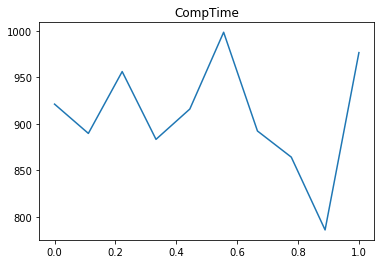

908.3799999999999+-57.85583462365746


904.0999999999999

In [103]:
evaluateCompTime([0.1,0.001,0.1,0.001,-0.1], 0, 10)

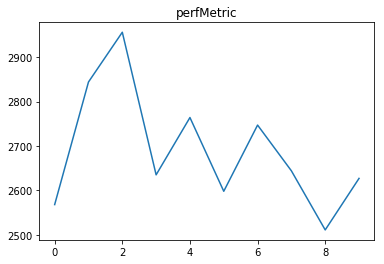

2689.4+-129.49610032738437


0.00037821482602118004

In [126]:
evaluatePerfMetric([0.1,0.001,0.1,0.001,-0.1], -10, 15)

step 0.0 879.5 2791.5
step 0.1111111111111111 1028.45 2897.5
step 0.2222222222222222 965.75 3214.0
step 0.3333333333333333 908.9 3235.583333333333
step 0.4444444444444444 885.5999999999999 3405.0
step 0.5555555555555556 785.6500000000001 3411.416666666667
step 0.6666666666666666 778.45 3257.75
step 0.7777777777777777 791.2 3102.75
step 0.8888888888888888 756.3499999999999 3240.916666666667
step 1.0 771.65 3272.666666666667


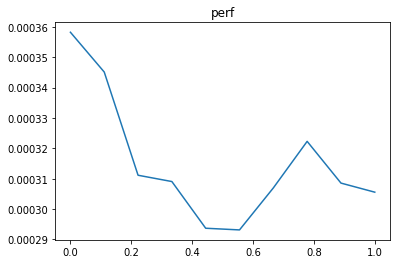

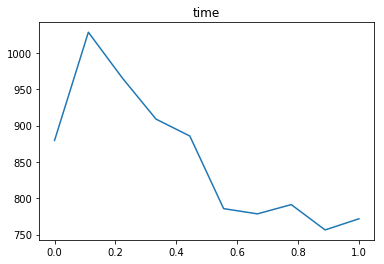

In [105]:
getTargetMetric([0.1,0.001,0.1,0.001,-0.1])

step 0.0 903.2 2447.5
step 0.010101010101010102 925.7 2431.0
step 0.020202020202020204 963.35 3584.5
step 0.030303030303030304 916.45 2473.833333333333
step 0.04040404040404041 919.7 2459.0
step 0.05050505050505051 939.45 2285.166666666667
step 0.06060606060606061 950.9 2360.0
step 0.07070707070707072 1006.9 2472.416666666667
step 0.08080808080808081 1013.9 2613.166666666667
step 0.09090909090909091 973.65 2767.0
step 0.10101010101010102 1036.35 2722.5
step 0.11111111111111112 1036.8 3015.0
step 0.12121212121212122 1080.5 3110.916666666667
step 0.13131313131313133 1045.0 3115.5
step 0.14141414141414144 1001.6 3069.75
step 0.15151515151515152 984.4000000000001 2887.416666666667
step 0.16161616161616163 964.6500000000001 2896.083333333333
step 0.17171717171717174 982.1 2843.833333333333
step 0.18181818181818182 991.95 2843.916666666667
step 0.19191919191919193 939.5 2914.0
step 0.20202020202020204 978.65 2964.0
step 0.21212121212121213 953.5 3097.166666666667
step 0.22222222222222224 977

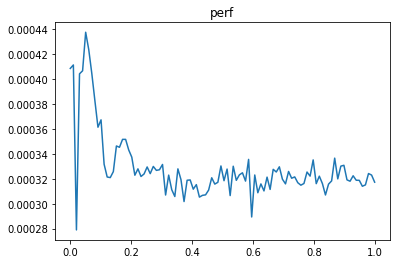

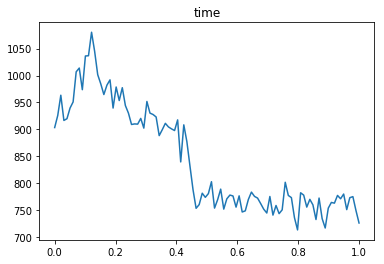

In [107]:
getTargetMetric([0.1,0.001,0.1,0.001,-0.1])

(([1257.7], [1257.7]), [2093.0, 2093.0, 7014.0, 2803.0, 2128.0, 2579.0, 2296.0, 2119.0, 2432.0, 2476.0, 2182.0, 2182.0, 2066.0, 2238.5])
(([1217.4], [1217.4]), [2132.0, 2132.0, 7079.0, 2890.0, 2196.0, 2464.0, 2231.0, 2136.0, 2364.0, 2431.0, 2410.0, 2069.0, 2228.0, 2272.3333333333335])
(([1256.1], [1256.1]), [2628.0, 2628.0, 8356.0, 3131.0, 2840.0, 2793.0, 2829.0, 2682.0, 2692.0, 2918.0, 2937.0, 2584.0, 2656.0, 2735.8333333333335])
(([1212.2], [1212.2]), [2890.0, 2890.0, 8469.0, 3218.0, 3340.0, 3020.0, 2972.0, 3241.0, 3119.0, 3386.0, 2788.0, 2836.0, 2783.0, 2967.0])
(([1192.0], [1192.0]), [3008.0, 3008.0, 8221.0, 3310.0, 2888.0, 3516.0, 3094.0, 2783.0, 3103.0, 3231.0, 3222.0, 2832.0, 3162.0, 3093.0])
([0.0, 0.25, 0.5, 0.75, 1.0], [0.000439882697947214, 0.00043840420868040335, 0.0003609963499257952, 0.0003274513370929598, 0.00032338040314756927])


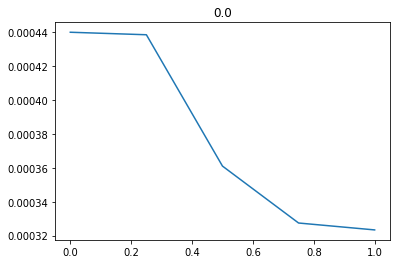

In [15]:
mainLoop()